In [23]:
import requests
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import base64
from selenium.webdriver.common.by import By
import time
import json
import os

In [24]:
def download_image_from_base64(data_url, save_path, keyword, idx):
    # url분할
    _, base64_data = data_url.split(',', 1)

    #  Base64  data 정의
    image_data = base64.b64decode(base64_data)

    # jpg 확장자 파일로 저장
    with open(save_path+f'{keyword}_{idx}.jpg', "wb") as file:
        file.write(image_data)
        print(f"Image downloaded and saved as: {keyword}_{idx}.jpg")

In [25]:
def download_image(image_url, save_path, keyword, idx):
    try:
        # url에 확장자 파일명이 없을 경우
        if 'data:image/jpeg;base64' in image_url:
            download_image_from_base64(image_url, save_path, keyword, idx)
        else:
            # image URL
            response = requests.get(image_url)
            # 에러페이지 
            if response.status_code == 200 or response.status_code == 403:
                image_content = response.content
    #             # URL확장자 파일 가져오기 (e.g., ".jpg", ".png")
                file_extension = os.path.splitext(image_url)[1]
                # 확장자파일 이미지 다운
                with open(save_path + file_extension, 'wb') as file:
                    file.write(image_content)
                print(f"Image downloaded and saved as: {save_path + file_extension}")
            else:
                print("Failed to download the image. Status code:", response.status_code)
    except Exception as e:
        print(f"Error occurred while downloading the image: {e}")

In [28]:
def search_selenium(query, search_path, keyword):        
    chrome_options = webdriver.ChromeOptions()
    chrome_options.binary = 'C:/Program Files/Google/Chrome/Application'
    
    driver = webdriver.Chrome()
    driver.get(f'https://www.google.com/imghp')
    
    search_bar = driver.find_element(By.NAME,"q")
    search_bar.send_keys(query)
    search_bar.submit()
    
    try:
            element = WebDriverWait(driver, 5).until(
                EC.presence_of_element_located((By.ID, "islrg"))
            )
    except:
        print("Timeout waiting for the page to load.")
        browser.quit()
        return
    
    last_height = driver.execute_script("return document.body.scrollHeight")
    img_count = 0
    while True:
        img_elements = driver.find_elements(By.CSS_SELECTOR,".rg_i")
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)
        img_elements = driver.find_elements(By.CSS_SELECTOR,".rg_i")
        for idx, img in enumerate(img_elements):
            try:
                img.click()
                time.sleep(5)
                img_element = driver.find_element(By.XPATH,'//*[@id="Sva75c"]/div[2]/div[2]/div[2]/div[2]/c-wiz/div/div/div/div[3]/div[1]/a/img[1]')
                img_src = img_element.get_attribute('src')
                img_alt = img_element.get_attribute('alt')
                print(img_src)
                print(img_alt)
                download_image(img_src, os.path.join(search_path, f"{keyword}_{img_count}"), keyword, img_count)
                img_count += 1
            except:
                pass
    driver.close()

검색하고 싶은 키워드 : ultrasound 3d fetal
저장할 폴더명 입력 : ultrasound3d fetal
https://www.verywellfamily.com/thmb/APBVQWobliIBgpD9xQpjj7OcIG8=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-157144755-56a773123df78cf772960e9a.jpg
3D or 4D Ultrasound vs. 2D Ultrasound
Image downloaded and saved as: D:/프로젝트_데이터/ultrasound3d fetal\ultrasound_0.jpg
https://i.ytimg.com/vi/sVB0qTiq5jU/maxresdefault.jpg
3D fetal ultrasound - amazing things fetuses do in the womb - Dr. I.  Shapiro - YouTube
Image downloaded and saved as: D:/프로젝트_데이터/ultrasound3d fetal\ultrasound_1.jpg
https://www.waynewomensclinic.com/wp-content/uploads/3dUltrasound1.jpg
Ultrasound-3D – Wayne Womens Clinic
Image downloaded and saved as: D:/프로젝트_데이터/ultrasound3d fetal\ultrasound_2.jpg
https://www.durangoultrasound.com/pictures/colorado-baby-ultrasound-3d-images.jpg
Colorado Prenatal 3D 4D Ultrasound Imaging | Durango Ultrasound
Image downloaded and saved as: D:/프로젝트_데이터/ultrasound3d fetal\ultrasound_3.jpg
https://adat
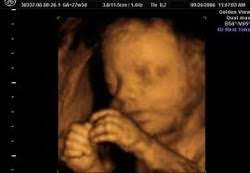
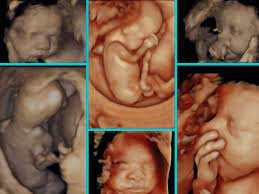
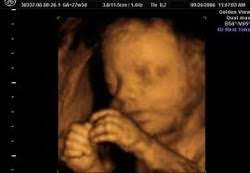
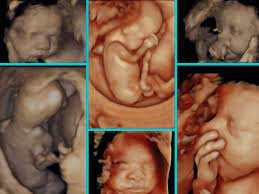
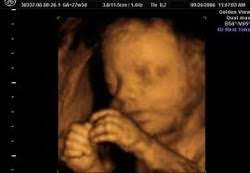
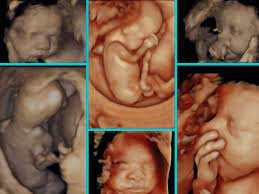
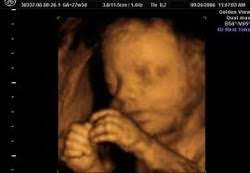
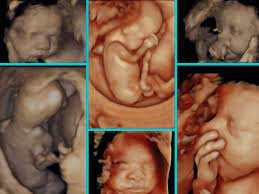
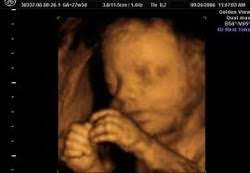
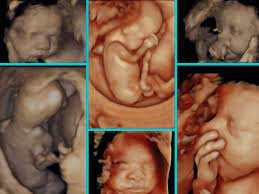
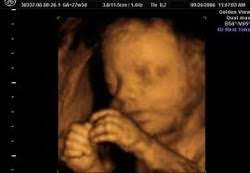
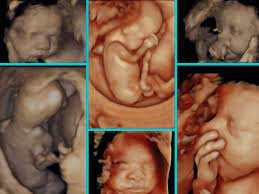
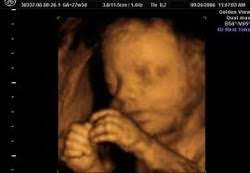
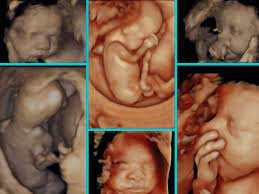
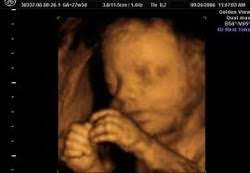
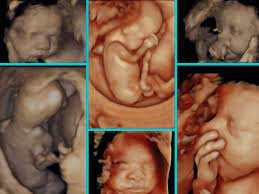
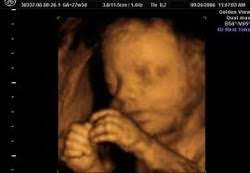
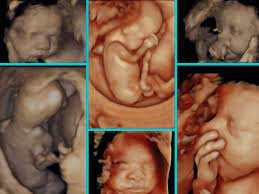
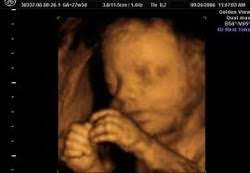
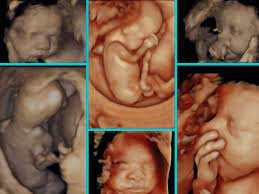
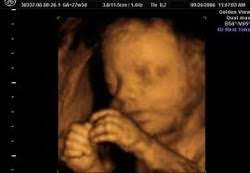
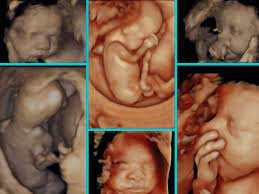
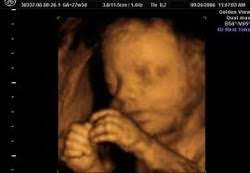
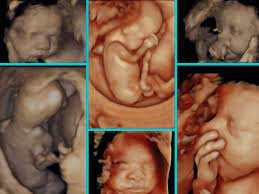
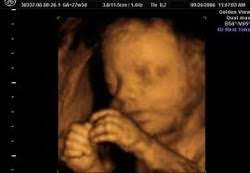
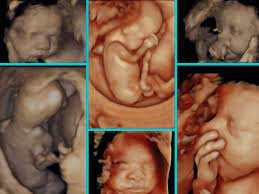
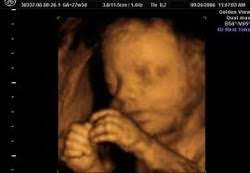
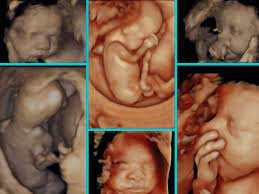
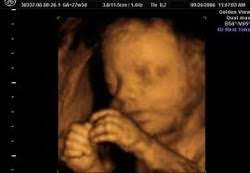
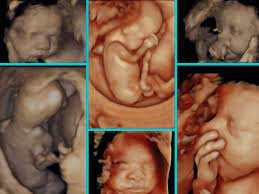
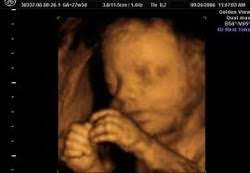
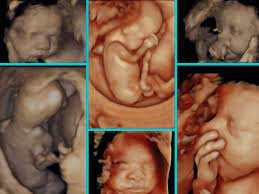
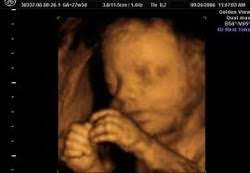
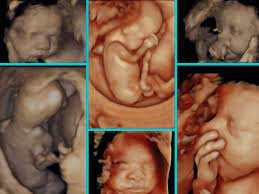
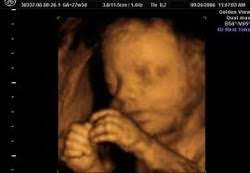
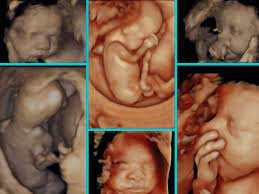
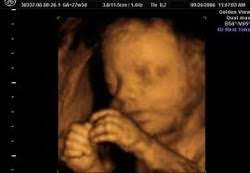
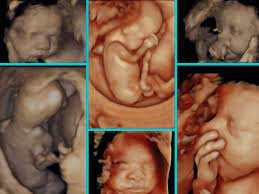
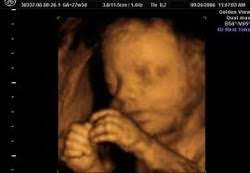
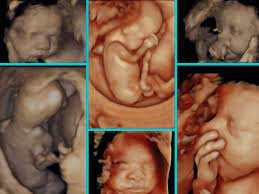
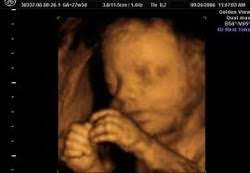
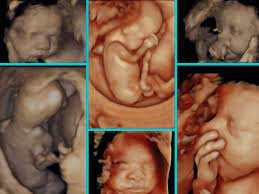
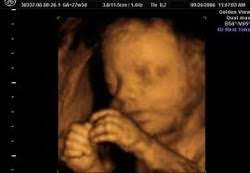
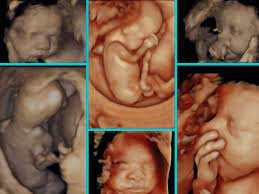
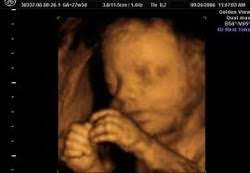
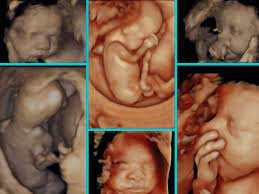
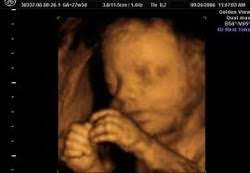
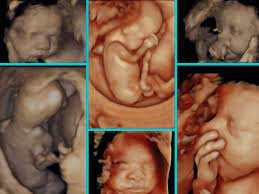
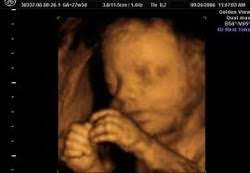
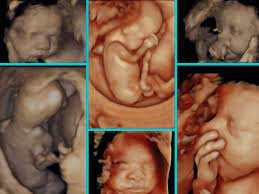
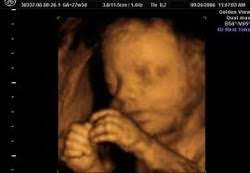
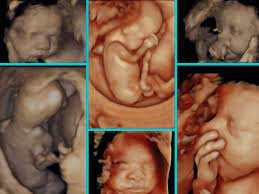
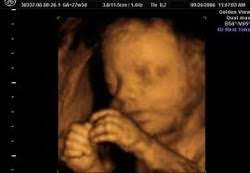
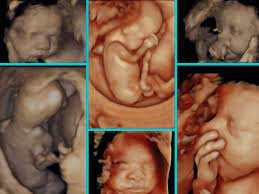
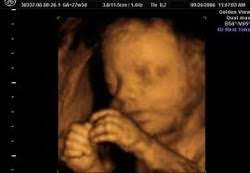
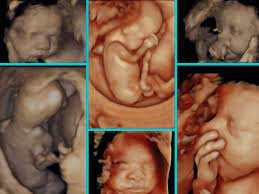
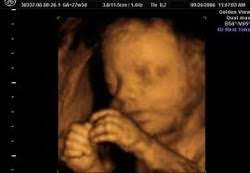
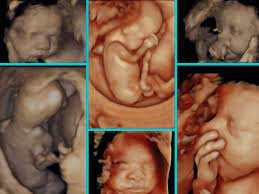
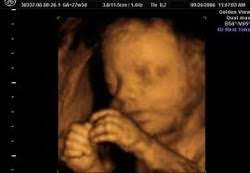
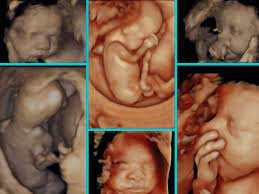
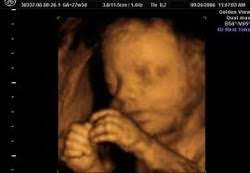
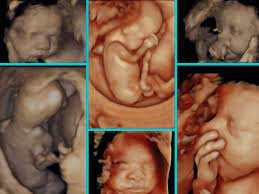
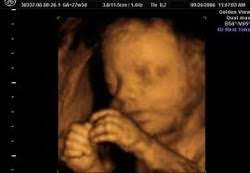
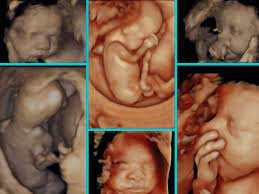
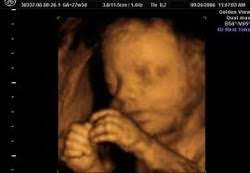
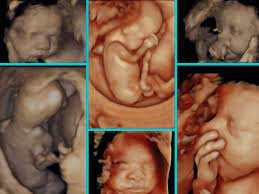
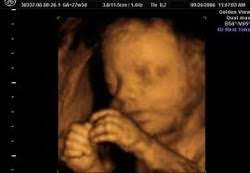
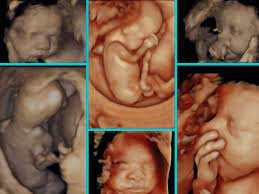
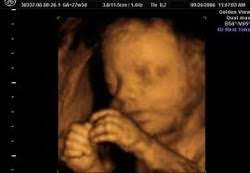
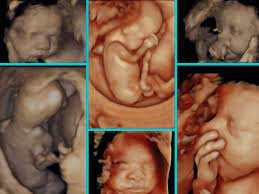
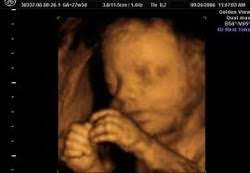
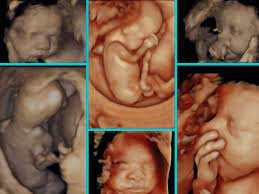
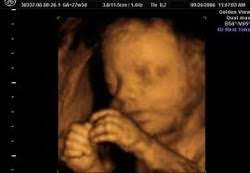
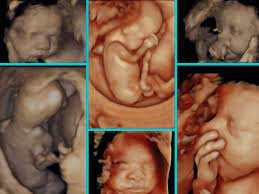
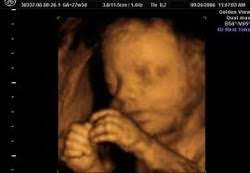
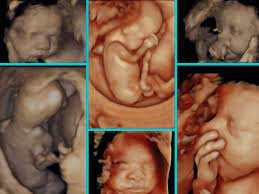
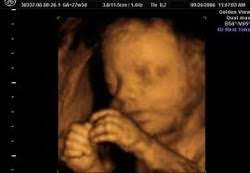
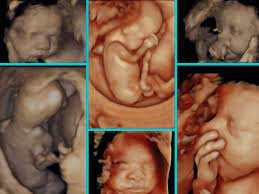
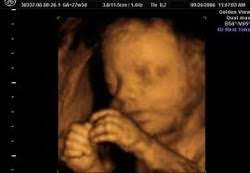
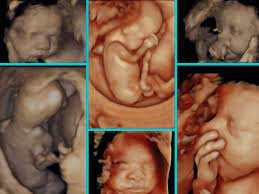
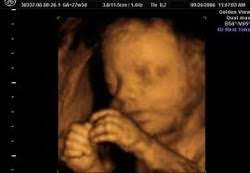
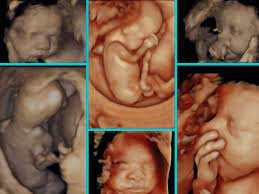
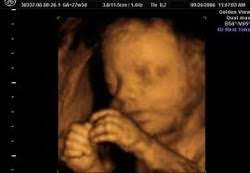
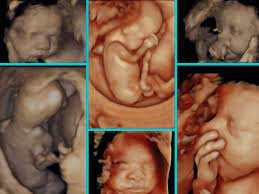
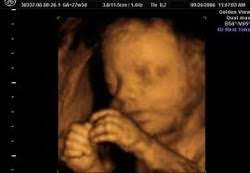
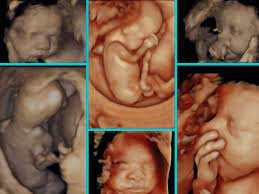
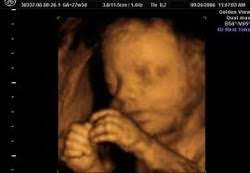
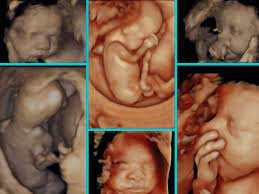
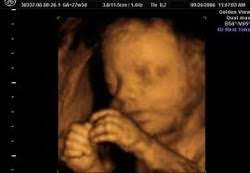
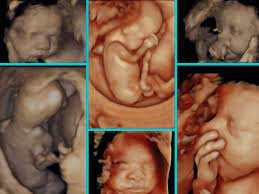
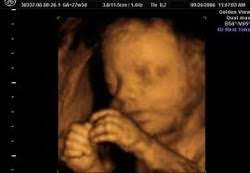
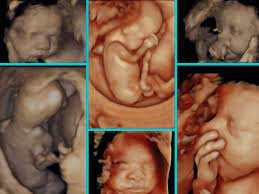
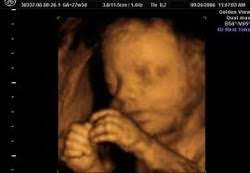
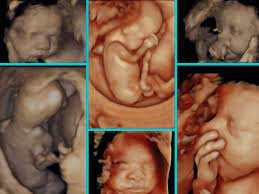
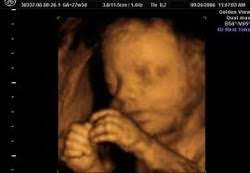
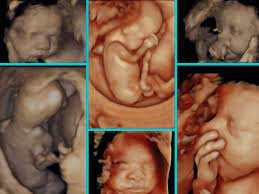
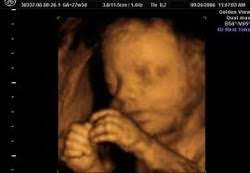
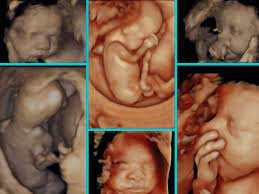
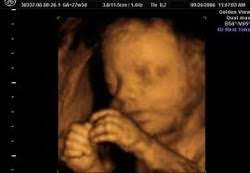
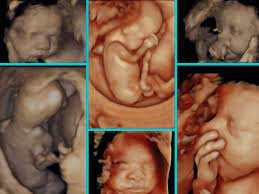
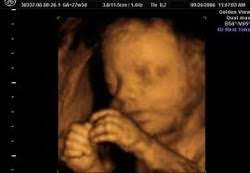
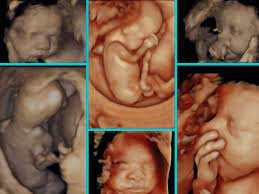
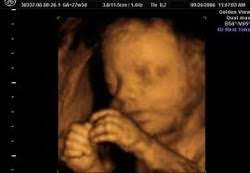
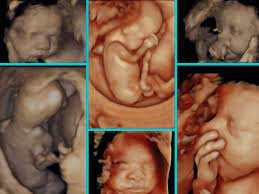
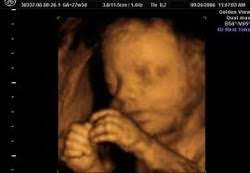
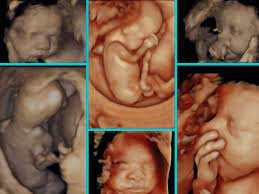
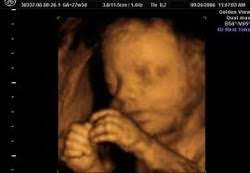
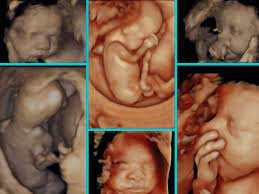
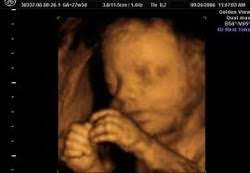
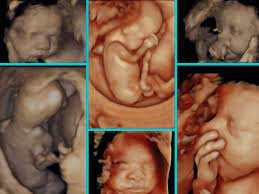
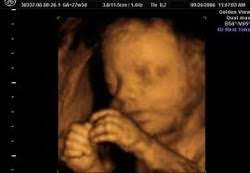
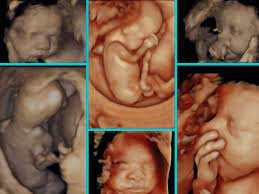
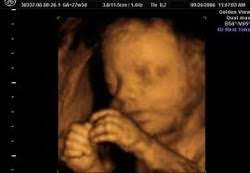
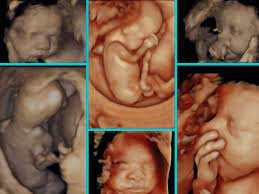

KeyboardInterrupt: 

In [29]:
search_name = input("검색하고 싶은 키워드 : ")
# keyword_test = input('이미지 제목에 특정 단어 :')
crawling_path = input("저장할 폴더명 입력 : ")
search_path = "D:/프로젝트_데이터/" + crawling_path # 폴더 설정
try:
    # 중복되는 폴더 명이 없다면 생성
    if not os.path.exists(search_path):
        os.makedirs(search_path)
    # 중복된다면 문구 출력 후 프로그램 종료
    else:
        print('이전에 같은 [검색어, 이미지 수]로 다운로드한 폴더가 존재합니다.')
        sys.exit(0)
except OSError:
    print('os error')
    sys.exit(0)
search_selenium(search_name, search_path, keyword_test)